# Accessing Arpege Data 
using ``meteofrance_publicapi``

## Get your application ID

See [the readme](https://github.com/antoinetavant/meteofranceapi?tab=readme-ov-file#usage) for details.

The following example uses a dotfile to store the secret.

In [1]:
import dotenv
import os
dotenv.load_dotenv()
application_id = os.getenv("APPLICATION_ID")

## Optional : activate the logs inside the notebook

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

# Initialize the client

In [4]:
from meteofrance_publicapi import ArpegeForecast
client = ArpegeForecast(application_id=application_id,
                       cache_dir="./.cache")


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


## Fetch the capabilities

It is best the first get the capabilities from the API to know what is available.

In [6]:
client.get_capabilities()
client.all_coverageid_prefix

['U_COMPONENT_OF_WIND__POTENTIAL_VORTICITY_SURFACE_1500',
 'MEDIUM_CLOUD_COVER__GROUND_OR_WATER_SURFACE',
 'TOTAL_CLOUD_COVER__GROUND_OR_WATER_SURFACE',
 'PRESSURE__MEAN_SEA_LEVEL',
 'SPECIFIC_CLOUD_ICE_WATER_CONTENT__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'BRIGHTNESS_TEMPERATURE__GROUND_OR_WATER_SURFACE',
 'V_COMPONENT_OF_WIND__POTENTIAL_VORTICITY_SURFACE_1500',
 'GEOMETRIC_HEIGHT__GROUND_OR_WATER_SURFACE',
 'POTENTIAL_VORTICITY__ISOBARIC_SURFACE',
 'TOTAL_SNOW_PRECIPITATION__GROUND_OR_WATER_SURFACE',
 'WIND_SPEED__ISOBARIC_SURFACE',
 'SPECIFIC_CLOUD_ICE_WATER_CONTENT__ISOBARIC_SURFACE',
 'DEW_POINT_TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'PRESSURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'U_COMPONENT_OF_WIND_GUST__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'TEMPERATURE__GROUND_OR_WATER_SURFACE',
 'SHORT_WAVE_RADIATION_FLUX__GROUND_OR_WATER_SURFACE',
 'DOWNWARD_SHORT_WAVE_RADIATION_FLUX__GROUND_OR_WATER_SURFACE',
 'MINIMUM_TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'PLANETA

As you can see from the coverage ID prefixes, quite a lot are available !
Lets use the temperature for this example.

In [7]:
coverage_name = "TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND"
coverageids = client.all_coverageid_of_name(coverage_name)
coverageids

['TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-21T00.00.00Z',
 'TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-21T06.00.00Z',
 'TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-21T12.00.00Z',
 'TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-21T18.00.00Z',
 'TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-22T00.00.00Z',
 'TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-22T06.00.00Z',
 'TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-22T12.00.00Z',
 'TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-22T18.00.00Z',
 'TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-23T00.00.00Z',
 'TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-23T06.00.00Z',
 'TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-23T12.00.00Z',
 'TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-23T18.00.00Z',
 'TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-24T00.00.00Z',
 'TEMPERATURE__SPECIFIC_H

The  `coverageids` corresponds to all the forecast computation available for this Temperature field.
This example was run on 2024-05-04 at 18:00 UTC.

The computations available goes back in the past up to 2024-04-01 up to the latests run available, today at 12:00 UTC.
Let's use the latests.

In [8]:
coverageid = coverageids[-1]
description = client.get_description(coverageid)

Here, description is a dict with a lot of information. For instance, you can get the limits of the domain with the following:

In [9]:
description["wcs:CoverageDescriptions"]["wcs:CoverageDescription"]["gml:boundedBy"]

{'gml:EnvelopeWithTimePeriod': {'@srsName': 'http://meteofrance.fr/def/crs/3DLongLatHeight',
  '@axisLabels': 'long lat height time',
  '@uomLabels': 'deg deg m ISO8601',
  '@srsDimension': '3',
  'gml:lowerCorner': '-32.0 20.0 2',
  'gml:upperCorner': '42.0 72.0 3000',
  'gml:beginPosition': {'@frame': '#ISO-8601',
   '#text': '2024-04-25T06:00:00Z'},
  'gml:endPosition': {'@frame': '#ISO-8601', '#text': '2024-04-29T12:00:00Z'}}}

You can see that
- longitude spans from -32° et 43°
- latitude spans from 20° to 42°
- height spans from 2m to 3000m
- time goes from 2024-04-25T06:00:00Z to 2024-04-29T12:00:00Z which means 4 days in the future !

This 4D domain can only be accessed by 2D slices.

According to the few tests I did, I seems that only the 2D lat-long can be accessed, which mean one time at a time.


In [10]:
temperature_filename = client.get_coverage(
    coverageid=coverageid,
    height=2,
    time=3600,  # the value for the time is a bit strange. It is the number of seconds since the start of the forecast.
    lat=(20, 72),
    long=(-32, 42)
)
temperature_filename

WindowsPath('.cache/TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2024-04-25T06.00.00Z/2m_3600Z_20-72_-32-42.tiff')

Text(0.5, 1.0, 'Temperature at 2m above ground \n computed at 2024-04-25T06.00 \n 1hour in the future')

c:\Users\antoi\.conda\envs\dev\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


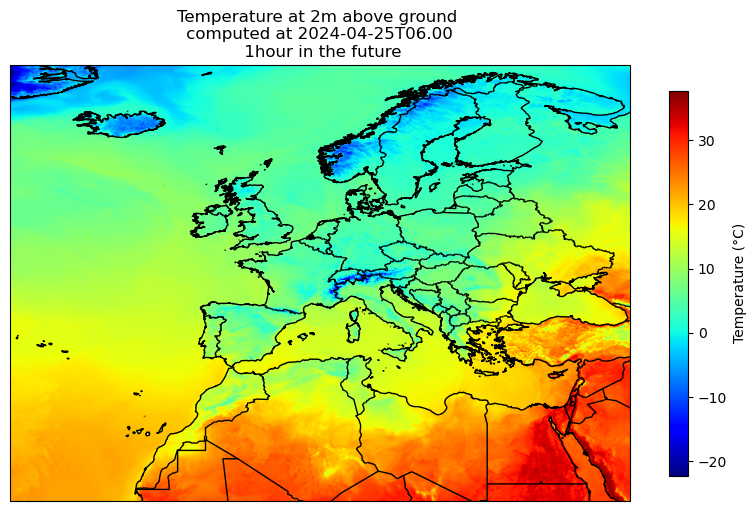

In [11]:
from meteofrance_publicapi.raster import plot_tiff_file
ax = plot_tiff_file(temperature_filename)
ax.set_title(ax.get_title() + "\n 1hour in the future")